In [1]:
from blimpy import Waterfall

In [2]:
FILE = "/d/astrodata/guppi_59012_79941_6072997821_XaS038-S5-HVS_S_0001.0000.h5"

In [4]:
obs = Waterfall(FILE)

extracting integration 0...


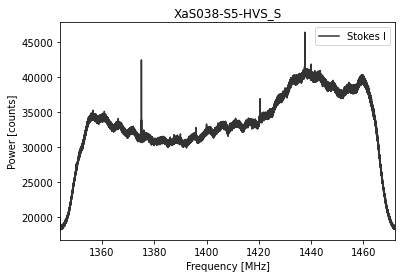

In [4]:
obs.plot_spectrum()

extracting integration 0...


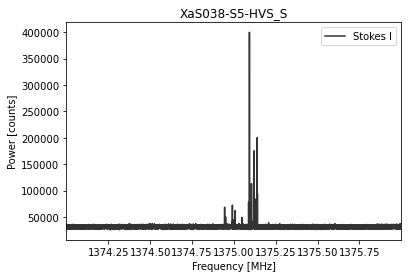

In [8]:
obs.plot_spectrum(f_start=1374, f_stop=1376)

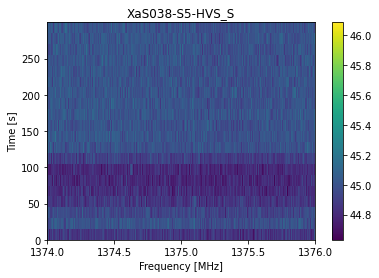

In [9]:
obs.plot_waterfall(f_start=1374, f_stop=1376)